# Data Science Notes

## SQL

### Creating Table

`
CREATE TABLE table_name (
    column1 datatype,
    column2 datatype
);
`


Examples of data types: PRIMARY KEY, UNIQUE, NOT NULL (must have value), DEFAULT (e.g. DEFAULT 10)

### Inserting Values

`
INSERT INTO table_name (col1, col2)
VALUES (val1, val2)
`

### Table Modification

`
ALTER TABLE table_name
ADD column_name datatype
`

`
DELETE FROM table_name
WHERE column_name = value
`

`
UPDATE table_name
SET column1 = value1, column2 = value2
WHERE any_column = some_value
`

### Accessing a Database

`
SELECT model
FROM cars
WHERE color = 'blue'
`

Operators Available:
* SELECT (*, DISTINCT, AS column_name)
* WHERE (IS (NOT) NULL, BETWEEN, =)
* AND, OR
* LIKE (% wildcard - 0 or more)
* ORDER BY (DESC & ASC)
* LIMIT 10





***

----

## Python

### Importing Files

`files = glob.glob("states*.csv")`

`df_list = []`  
`for filename in files:`  
  `df_list.append(pd.read_csv(filename))`

`df = pd.concat(df_list)`


### Regex

* **.**   -   Wildcard
* **?**   -   Optional Wildcard
* **[]**   -   Single match for any characters inside
* **{#}**   -   Quantify the exact number of that character
* **|**   -   Match either of two expressions
* **^,$**   - Anchors. Match text at start or end of string
* **\w**   -   number/character (\W for opposite)
* **\d**   -   number (\D for opposite)

### Useful Pandas Functions

* `df[df.column > 40]` -  Select rows of df

* `data.describe(include = 'all') OR data.column.describe()` - Summarises data

* `df.info` - Amount of non-null types and dtypes

* `df.shape` - Identifies no. of rows and columns

* `df['Column'].idxmax()` - Gives index of max of specific column

* `df.iloc[[0]] & df.loc[[0]]` - iloc selects integer index, loc selects labeled index

* `df = df.drop_duplicates()` - Drops duplicates (.reset_index() as well)

* `df.columns = map(str.lower, df.columns)` - Applies lower to each of the column names

* `df.isna().sum()` - Find null values

* `df[column] = df[column].where(df[column] > 40, np.nan)` - Replaces all values > 40 with np.nan

* `df.groupby('column_name').mean()` - Grouping values in a dataframe

* `df['newcol'] = df.groupby('groupid').transform(mean)`

* `df.replace('a','b', regex=True)` - Replaces cells in df

* `df.apply(lambda x: x+x, axis=1)` - Doubles all cells

* `df['category'].value_counts(dropna=False)` - Counts the amount in each category

#### **Crosstab is used to compute the frequency of two or more variables (usually null)**
  
`pd.crosstab(`
 
<i>tabulates the boroughs as the index</i>    
`restaurants['boro'],  `
 
<i>tabulates the number of missing values in the url column as columns</i>  
`restaurants['url'].isna(), `
 
<i>names the rows</i>  
`rownames = ['boro'],`
 
<i>names the columns</i>  
`colnames = ['url is na'])  `
)

#### **Melt is used to clean a dataframe to make each row an observation**

`annual_wage=annual_wage.melt(`

<i>which column to use as identifier variables</i>  
`      id_vars=["boro"], `

<i>column name to use for “variable” names/column headers (ie. 2000 and 2007) </i>  
`      var_name=["year"], `

<i>column name for the values originally in the columns 2000 and 2007</i>  
`      value_name="avg_annual_wage") `
 
`print(annual_wage)`
)

#### **Pivot to restructure a dataframe**
`data_tidy = data.pivot(index='Country', columns='Feature', values='Observation').reset_index()`

***

## Hypothesis Testing: Associations

### Assumptions
1. All observations are independant and randomly sampled
2. Standard deviations of groups should be equal
3. Data should be normally distributed or large sample size
4. Groups seperated by categorical variable should be independant

<center><img src="Images/HT - Associations.png" width="1000" height="700"></center>

In [26]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

* `tstat,pval = ttest.ind(data1, data2)`
* `fstat,pval = f_oneway(data1, data2, data3)`
* `chi2,pval,dof,expected = chi2_contingency(ab_contingency)`
* `tukey_reuslts = pairwise_tukeyhsd(data1,data2,p-value)` - Pandas db has to be crosstabbed with pd.crosstab()

## Feature Engineering

<center><img src="intro to Feature Engg Table.png" width="700" height="350"></center>

#### 1. Standardising Data
Centering the data and dividing by standard deviation. Results in a mean of 0 and sd. of 1.

In [27]:
import numpy as np
ages = np.random.randint(1,100,10)

# Manually

mean_age = np.mean(ages)
std_dev_age = np.std(ages)
ages_standardized = (ages-mean_age)/std_dev_age

# Using Sklearn

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
ages_reshaped = np.array(ages).reshape(-1,1)

ages_scaled = scaler.fit_transform(ages_reshaped)

#### 2. Min-max normalisation
Transforming the dataset to fit between 0-1.

In [28]:
# Manually

max_age = np.max(ages)

min_age = np.min(ages)

age_range = max_age - min_age
age_normalized = (ages-min_age)/age_range

# Using Sklearn

from sklearn.preprocessing import MinMaxScaler

ages_reshaped = np.array(ages).reshape(-1,1)
mmscaler = MinMaxScaler()
reshaped_scaled = mmscaler.fit_transform(ages_reshaped)

#### 3. Binning Data

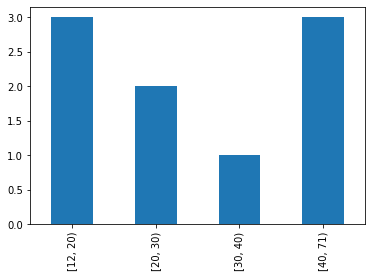

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

age_bins = [12,20,30,40,71]
binned_ages = pd.cut(ages,age_bins,right=False)

binned_ages.value_counts().plot(kind='bar')
plt.show()

### Encoding Categorical Variables

* **Ordinal Encoding**: <br>
Create dictionary of label: values in order

* **Label Encoding**: <br>
Create dictionary of label: no order

* **One-Hot Encoding (Ohe)**: <br>
Create binary variables for each of the nominal categories.

* **Binary Encoding**: <br>
Change categories into binary with columns representing each unit placement.


In [30]:
data = [['Excellent', 'black'], ['Fair', 'orange'], ['Like New', 'black']]
cars = pd.DataFrame(data, columns=['condition', 'color'])

## Ordinal Encoding

rating_dict = {'Excellent':5, 'New':4, 'Like New':3, 'Good':2, 'Fair':1}
 
cars['condition_rating'] = cars['condition'].map(rating_dict)

cars['color'] = cars['color'].astype('category')

# One-Hot Encoding

ohe = pd.get_dummies(cars['color'])
cars['color'] = cars['color'].cat.codes
cars = cars.join(ohe)

# Binary Encoding

from category_encoders import BinaryEncoder
colors = BinaryEncoder(cols = ['color'], drop_invariant = True).fit_transform(cars)

# Date-Time

import datetime

timestamp= datetime.datetime(year=2019, month=2, day=16, hour=13, minute=48, second=5)
timestamp = datetime.datetime(2019, 2, 16, 13, 48, 5)
print (timestamp)

2019-02-16 13:48:05


### Linear Regression and Multiple Regression and Training Data

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Creating Sales vs Temperature Dataset
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

# Sklearn Linear Regression

regr = LinearRegression()
regr.fit(temperature,sales) # X = df.temperature.values.reshape(-1,1) if needed
sales_predict = regr.predict(temperature)

# Regression Features
regr.coef_
regr.intercept_
regr.score() # x_train and y_train for scoring against train data

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
from sklearn.model_selection import train_test_split

# Test Data
df = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df.rent

# Training Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)
mlr = LinearRegression()
mlr.fit(x_train,y_train)
mlr.score(x_train,y_train)
mlr.score(x_test,y_test)

0.7467332043233916

### Logistic Regression

Supervised ML algorithm to predict probability of a datapoint belonging to a specific category.

Odds: $\frac{p}{1-p}$ <br>
<br>
Log-Odds: $ln{(\frac{p}{1-p})}$

Probability = $\frac{e^{log\_odds}}{(1+ e^{log\_odds})}$

In [ ]:
from sklearn.linear_model import LogisticRegression
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
lr.predict_proba(X_test)
"""

from sklearn.metrics import confusion_matrix
"""
confusion_matrix(y_true,y_pred)

array([[True Negative, False Positive]
       [False Negative, True Positive]])
       
"""




'\nlr = LogisticRegression()\nlr.fit(X_train,y_train)\nlr.predict(X_test)\nlr.predict_proba(X_test)\n'

### K-Nearest Neighbours (kNN)

* A classification algorithm used to classify specific data points by looking at '_k_' of its nearest neighbours. 
* Whatever is the majority in the _k_, the point is classified as such.

1. Normalise the data.
2. Find the k nearest neighbours.
3. Classify the new point based on those neigbours.

In [ ]:
# Creating Data
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
training_labels = [0, 1, 1]

# Using SkLearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

k = 3
classifier = KNeighborsClassifier(n_neighbors = k)
classifier = KNeighborsRegressor(n_neighbors = k, weights = "distance")
classifier.fit(training_points, training_labels)
classifier.score(training_points, training_labels)
# classifier.predict(unknown_points) *Where unknown_points must be a list

0.9999999999999986

In [ ]:
from sklearn.tree import DecisionTreeClassifier


### Decision Tree

* A flow chart created from the features of the data.

<center><img src="Images/Decision Tree.png" width="700" height="500"></center>